In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


data = pd.read_excel('Google_stock.xlsx')

#Sort the data by date
data = data.sort_values('Date')

data = data.drop('Date', axis=1)
close_data = data.filter(['Close']).values


scaler = MinMaxScaler(feature_range=(0, 1))
close_data = scaler.fit_transform(close_data)


X_train, X_test, Y_train, Y_test = train_test_split(close_data, close_data, test_size=0.2, shuffle=False)


# Create sequences of data with the defined sequence length
sequence_length = 10

def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, Y_train = create_sequences(X_train, sequence_length)
X_test, Y_test = create_sequences(X_test, sequence_length)


'''data1 = pd.read_excel('Google_stock.xlsx')

#Sort the data by date
data1 = data1.sort_values('Date')'''



'''to5=[]
just6=[]
for i in data:
    to5.append(i[0:5])
    just6.append(i[5])
print(just6)

X_train, X_test, Y_train, Y_test = train_test_split(to5, just6, test_size=0.2, random_state=32)'''




'''
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(data1[['Open', 'High', 'Low', 'Close', 'Adj Close']], data1['Volume'], test_size=0.2, random_state=32)

'''
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)



'''
X_train1=np.array(X_train1)
X_test1=np.array(X_test1)
Y_train1=np.array(Y_train1)
Y_test1=np.array(Y_test1)'''





# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])










In [193]:


'''#Reshape the input data to be 2D

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

Y_train = np.reshape(Y_train, (Y_train.shape[0]))
'''

print(X_train.shape)
print(Y_train.shape)


(1097, 10)
(1097,)


In [194]:


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
35/35 [==============================] - 1s 2ms/step - loss: 0.0723
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 4.9662e-04
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 3.1339e-04
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 2.7980e-04
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 2.5338e-04
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 2.4721e-04
Epoch 9/100
35/35 [==============================] - 0s 3ms/step - loss: 2.4359e-04
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 2.2528e-04
Epoch 11/100
35/35 [==============================] - 0s 3ms/step - loss: 2.1223e-04
Epoch 12/100
35/35 [==============================] - 0s 3ms/step - loss: 2.0720e-04
E

In [195]:

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

print(train_predictions.shape)
print(test_predictions.shape)



# Reshape the input data to be 2D
train_predictions = np.reshape(train_predictions[:, 0], (-1,))
test_predictions = np.reshape(test_predictions[:, 0], (-1,))

# Inverse transform the data
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1)).reshape(-1)
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1)).reshape(-1)


'''
#Reshape the input data to be 2D
train_predictions = np.reshape(train_predictions, (train_predictions.shape[0]*train_predictions.shape[1]))
test_predictions = np.reshape(test_predictions, (test_predictions.shape[0]*test_predictions.shape[1]))
'''

print(train_predictions.shape)
print(test_predictions.shape)




9/9 [==============================] - 0s 2ms/step
(1097, 10)
(267, 10)
(1097,)
(267,)


In [196]:

# Denormalize the predictions
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))





In [197]:

print(train_predictions)

[[297360.28]
 [295603.38]
 [295171.7 ]
 ...
 [769821.6 ]
 [776997.9 ]
 [782197.6 ]]


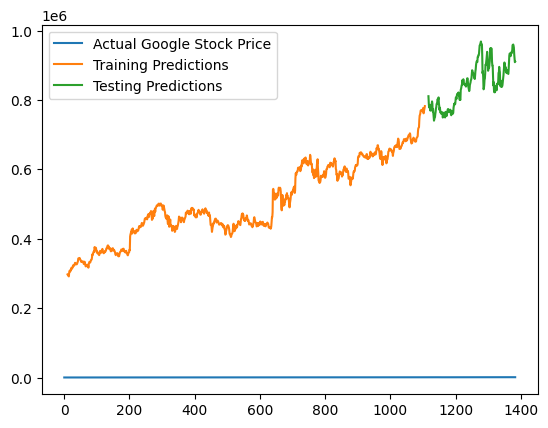

In [198]:
# Plot the predictions
train_plot = np.empty_like(close_data)
train_plot[:, :] = np.nan
train_plot[10:len(train_predictions)+10, :] = train_predictions

test_plot = np.empty_like(close_data)
test_plot[:, :] = np.nan
test_plot[len(train_predictions)+(10*2):len(close_data), :] = test_predictions


plt.plot(scaler.inverse_transform(close_data), label='Actual Google Stock Price')
plt.plot(train_plot, label='Training Predictions')
plt.plot(test_plot, label='Testing Predictions')
plt.legend()
plt.show()